In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


In [2]:
# Read the City and Ride Data

ride_data_city = pd.read_csv("../Pyber/data/city_data.csv")
ride_data_ride = pd.read_csv("../Pyber/data/ride_data.csv")


In [3]:
#Combine the data in a single dataset

combined_ride_data = pd.merge(ride_data_ride, ride_data_city, on="city")

# Display the data table for preview
combined_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [4]:
# Create new data frames for city_urban

city_urban = combined_ride_data.loc[(combined_ride_data['type'] == "Urban")]


In [5]:
# Calculations in which to plot for city_urban data 

# Calculate the avergae fare per city
avg_fare_urban = city_urban.groupby('city')['fare'].mean()

# Calculate the total number of rides per city
ride_city_urban = city_urban.groupby('city')['ride_id'].count()

# Calculate the numebr of drivers per city
city_drivers_urban = city_urban.groupby('city')['driver_count'].mean()


In [6]:
# Create new data frames for city_rural

city_rural = combined_ride_data.loc[(combined_ride_data['type'] == "Rural")]

In [7]:
# Calculations in which to plot for city_rural data 

# Calculate the avergae fare per city
avg_fare_rural = city_rural.groupby('city')['fare'].mean()

# Calculate the total number of rides per city
ride_city_rural = city_rural.groupby('city')['ride_id'].count()

# Calculate the numebr of drivers per city
city_drivers_rural = city_rural.groupby('city')['driver_count'].mean()

In [8]:
# Create new data frames for city_suburban

city_suburban = combined_ride_data.loc[(combined_ride_data['type'] == "Suburban")]

In [9]:
# Calculations in which to plot for city_suburban data 

# Calculate the avergae fare per city
avg_fare_suburban = city_suburban.groupby('city')['fare'].mean()

# Calculate the total number of rides per city
ride_city_suburban = city_suburban.groupby('city')['ride_id'].count()

# Calculate the numebr of drivers per city
city_drivers_suburban = city_suburban.groupby('city')['driver_count'].mean()

In [10]:
# Calculate the max and min for the x and y coordinates
avg_fare = combined_ride_data.groupby('city')['fare'].mean()
ride_city = combined_ride_data.groupby('city')['ride_id'].count()


max_x = ride_city.max()
max_y = avg_fare.max()
min_y = avg_fare.min()


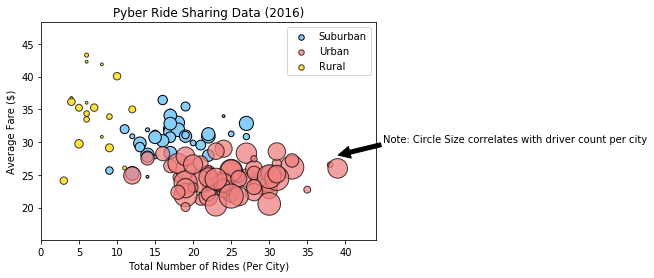

In [12]:
#Create a scatter plot number of rides, average fare, driver count

plt.scatter(ride_city_suburban, avg_fare_suburban, s=city_drivers_suburban*8, facecolors="lightskyblue", edgecolors='black', label ="Suburban", alpha = 1)
plt.scatter(ride_city_urban, avg_fare_urban, s=city_drivers_urban*8, facecolors="lightcoral", edgecolors='black', label = "Urban", alpha = 0.75)
plt.scatter(ride_city_rural, avg_fare_rural, s=city_drivers_rural*8, facecolors="gold", edgecolors='black', label = "Rural", alpha = 0.75)

# create scatter plot x and y axis parameters
plt.xlim(0, max_x + 5)
plt.ylim(min_y - 5, max_y + 5)

# create chart title, labels, legends, note on driver count, and formatting
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
lgnd = plt.legend(loc="upper right", fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
plt.annotate('Note: Circle Size correlates with driver count per city', xy=(39,28), xytext=(45,30),arrowprops=dict(facecolor='black',shrink=.01))

# create chart and save file to folder
plt.savefig("../Pyber/PyberImage.png")
plt.show()


## Total Fares by City Type

In [13]:
# Calculate % of total fares by City Type

# Calculate fare total - use similiar from above
total_fare = combined_ride_data.groupby('type')['fare'].sum()


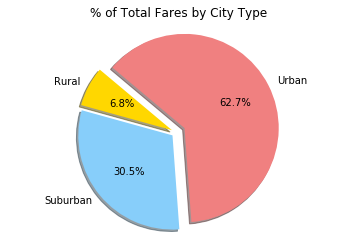

In [14]:
# Plot Pie Chart

#Create labels for the sections of the pie chart
labels = ["Rural", "Suburban", "Urban"]

# Colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# explode to seperate sections of the pie chart
explode = (0.05, 0.05, 0.1)

plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis("equal")
plt.title("% of Total Fares by City Type")

plt.savefig("../Pyber/Pyber Pie Chart by Fare.png", dpi=100)
plt.show()


## Total Rides by City Type

In [15]:
# Calculate % of total rides by City Type

# Calculate ride total - use similiar from above
total_ride = combined_ride_data.groupby('type')['ride_id'].count()


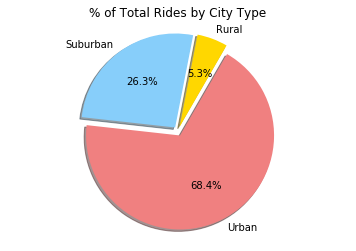

In [16]:
# Plot Pie Chart

#Create labels for the sections of the pie chart - discovered can use index
labels = total_ride.index

# Colors of each section of the pie chart pulled from variable above
# explode to seperate sections of the pie chart
explode = (0.05, 0.05, 0.05)

plt.pie(total_ride, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=60)

plt.axis("equal")
plt.title("% of Total Rides by City Type")

plt.savefig("../Pyber/Pyber Pie Chart by Riders.png", dpi=100)
plt.show()

## Total Drivers by City Type

In [60]:
# Calculate % of total drivers by City Type

# Calculate driver total 
total_driver = pd.DataFrame(combined_ride_data.groupby(['city', 'type','driver_count'])['driver_count'].mean())
total_driver_sum = total_driver.groupby('type')['driver_count'].sum()

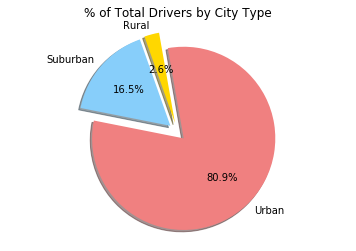

In [61]:
# Plot Pie Chart

#Create labels for the sections of the pie chart - discovered can use index
labels = total_driver_sum.index

# Colors of each section of the pie chart pulled from variable above
# explode to seperate sections of the pie chart
explode = (0.1, 0.1, 0.1)

plt.pie(total_driver_sum, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=100)

plt.axis("equal")
plt.title("% of Total Drivers by City Type")

plt.savefig("../Pyber/Pyber Pie Chart by Drivers.png", dpi=100)
plt.show()